# Examples and calculations for the ??? dataset

In [1]:
import copy
import numpy as np
import xgi
import pandas
from itertools import permutations
from itertools import combinations
from collections import Counter, defaultdict

import matplotlib.pyplot as plt

from hyperfunctions import *
from other_measures import *

We can load the dataset from XGI directly. 

In [2]:
H = xgi.load_xgi_data("email-eu")

In [3]:
len(H.nodes), len(H.edges), H.edges.size.max()

(1005, 235263, 40)

In [4]:
H.remove_edges_from(H.edges.singletons()) # Remove edges with a single node in them (there are ~5000)
H.remove_nodes_from(H.nodes.isolates())   # There are 6 nodes which only belonged to those singleton edges, we remove them as well.
# Relabel all nodes to start from zero to the current number of nodes
H = xgi.convert_labels_to_integers(H)

H.cleanup(connected=False) #This basically does the same as the three above + checks for multiedges and removes them

In [5]:
len(H.nodes), len(H.edges), H.edges.size.max()

(986, 24520, 40)

In [6]:
xgi.is_connected(H)

True

## Hypergraph statistics

In [7]:
print("Complete")
len(H.nodes), len(H.edges), H.edges.size.max()

Complete


(986, 24520, 40)

In [8]:
sizes = defaultdict(int)
for edge in H.edges.members():

    if len(edge) == 0:
        print(edge)
    sizes[len(edge)] += 1

<BarContainer object of 38 artists>

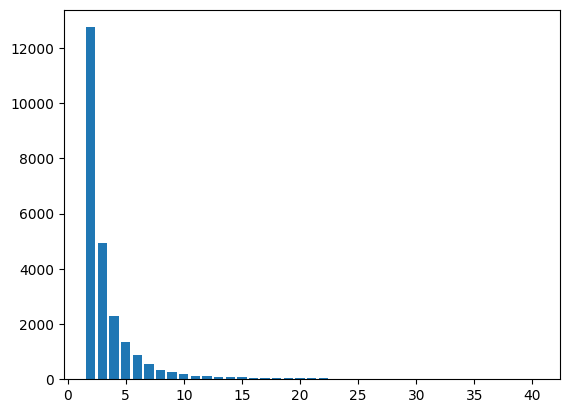

In [9]:
plt.bar(sizes.keys(), sizes.values())

In [10]:
edgedict = H.edges.members(dtype=dict)

In [11]:
Hunif = {}
for m in sizes.keys():
    
    Hunif[m] = uniform_section(H, edgedict, m)

    print("Order", m)
    print(len(Hunif[m].nodes), len(Hunif[m].edges), (Hunif[m].edges.size.min(), Hunif[m].edges.size.max()), len(Hunif[m].nodes)/len(H.nodes))
    print("---")

Order 2
945 12753 (2, 2) 0.9584178498985801
---
Order 8
548 352 (8, 8) 0.5557809330628803
---
Order 6
607 888 (6, 6) 0.6156186612576064
---
Order 4
691 2293 (4, 4) 0.7008113590263692
---
Order 3
792 4938 (3, 3) 0.8032454361054767
---
Order 5
644 1359 (5, 5) 0.6531440162271805
---
Order 16
328 54 (16, 16) 0.332657200811359
---
Order 11
404 132 (11, 11) 0.40973630831643004
---
Order 12
439 112 (12, 12) 0.44523326572008115
---
Order 7
556 551 (7, 7) 0.563894523326572
---
Order 25
217 19 (25, 25) 0.22008113590263692
---
Order 20
311 36 (20, 20) 0.3154158215010142
---
Order 10
458 187 (10, 10) 0.4645030425963489
---
Order 9
521 272 (9, 9) 0.5283975659229209
---
Order 13
346 74 (13, 13) 0.3509127789046653
---
Order 15
342 66 (15, 15) 0.34685598377281945
---
Order 19
329 42 (19, 19) 0.33367139959432046
---
Order 21
273 32 (21, 21) 0.2768762677484787
---
Order 18
300 51 (18, 18) 0.30425963488843816
---
Order 14
360 71 (14, 14) 0.36511156186612576
---
Order 17
302 46 (17, 17) 0.3062880324543610

## Order 2 - pure CEC 

In [12]:
cec = xgi.clique_eigenvector_centrality(H)

df = pandas.DataFrame({"CEC": cec})

## UPHEC at different orders

In [13]:
for m in range(2,H.edges.size.max() + 1):

    print("Order", m)
    
    Tm = uniform_adjacency_combinatorial_tensor(H, m=m, math_notation=False)
    
    centm = HEC_ours(Tm, m=m, niter=100000, tol=1e-6, verbose=True)

    # Remove last node (auxiliary) from uplift
    if m > 2:
        centm = centm[0][:-1] #extract last node
        centm /= np.sum(centm) # normalize

    if centm[1]:
        df[f"UPHEC-{m}"] = centm[0]

    print("---")

Order 2
Finished in 15 iterations.
---
Order 3
Finished in 28 iterations.
---
Order 4



KeyboardInterrupt



## Uniform HEC at each order (as in Benson's work)

In [ ]:
for m in sizes.keys():

    centmunif = xgi.algorithms.h_eigenvector_centrality(Hunif[m])
    
    for missing_node in range(len(H.nodes)):
        if missing_node not in centmunif.keys():
            centmunif[missing_node] = 0
    
    df[f"HEC-{m}unif"] = centmunif

## Alternative uniformization scheme at different orders -- NOT DONE

### Order 2 == the same as the UPHEC

### Order 3

In [ ]:
%%time

T3alt = alternative_uniformization(H, m=3, math_notation=False)

cent3alt = HEC_ours(T3alt, m=3, niter=100000, tol=1e-6, verbose=True)

In [ ]:
if cent3alt[1]:
    df["AltUnif-3"] = cent3alt[0]

### Order 4

In [ ]:
%%time

T4alt = alternative_uniformization(H, m=4, math_notation=False)

cent4alt = HEC_ours(T4alt, m=4, niter=100000, tol=1e-6, verbose=True)

if cent4alt[1]:
    df["AltUnif-4"] = cent4alt[0]

### Orden 5

In [ ]:
%%time 

T5alt = alternative_uniformization(H, m=5, math_notation=True)

cent5alt = HEC_ours(T5alt, m=5, niter=100000, tol=1e-6, verbose=True)

if cent5alt[1]:
    df["AltUnif-5"] = cent5alt[0]

## Save everything

In [ ]:
#df1 = pandas.read_csv("Output/diseasome_dataframe.csv")

In [ ]:
#df2 = df1.join(df)

In [ ]:
#df2.to_csv("Output/diseasome_dataframe.csv", index=False)

In [ ]:
#df2